In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [12]:

meas_first = session.query(Measurement).first()
meas_first.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x23ddef29940>,
 'station': 'USC00519397',
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01',
 'prcp': 0.08}

In [78]:
rain = session.query(Measurement.date, Measurement.prcp).group_by(Measurement.date).\
       order_by(Measurement.date.desc()).limit(365).all()
rain

[('2017-08-23', 0.45),
 ('2017-08-22', 0.5),
 ('2017-08-21', 0.56),
 ('2017-08-20', None),
 ('2017-08-19', 0.09),
 ('2017-08-18', None),
 ('2017-08-17', 0.13),
 ('2017-08-16', 0.42),
 ('2017-08-15', 0.42),
 ('2017-08-14', 0.22),
 ('2017-08-13', None),
 ('2017-08-12', 0.14),
 ('2017-08-11', None),
 ('2017-08-10', 0.07),
 ('2017-08-09', 0.15),
 ('2017-08-08', 0.34),
 ('2017-08-07', 0.05),
 ('2017-08-06', None),
 ('2017-08-05', None),
 ('2017-08-04', 0.0),
 ('2017-08-03', 0.06),
 ('2017-08-02', 0.25),
 ('2017-08-01', None),
 ('2017-07-31', 0.0),
 ('2017-07-30', 0.3),
 ('2017-07-29', 0.3),
 ('2017-07-28', 0.4),
 ('2017-07-27', 0.0),
 ('2017-07-26', 0.3),
 ('2017-07-25', 0.3),
 ('2017-07-24', 0.84),
 ('2017-07-23', 0.8),
 ('2017-07-22', 4.0),
 ('2017-07-21', 0.1),
 ('2017-07-20', 0.7),
 ('2017-07-19', 0.27),
 ('2017-07-18', 2.4),
 ('2017-07-17', 0.39),
 ('2017-07-16', 0.5),
 ('2017-07-15', 0.1),
 ('2017-07-14', 0.68),
 ('2017-07-13', 0.68),
 ('2017-07-12', 0.05),
 ('2017-07-11', 0.0),
 ('20

In [47]:
rain_df = pd.DataFrame(rain)
rain_df.head()

,date,prcp
0,2017-08-23,0.45
1,2017-08-22,0.50
2,2017-08-21,0.56
3,2017-08-20,NaN
4,2017-08-19,0.09


In [48]:
rain_2017_df = rain_df.set_index("date")
rain_2017_df.head()

,prcp
date,
2017-08-23,0.45
2017-08-22,0.50
2017-08-21,0.56
2017-08-20,NaN
2017-08-19,0.09


<IPython.core.display.Javascript object>


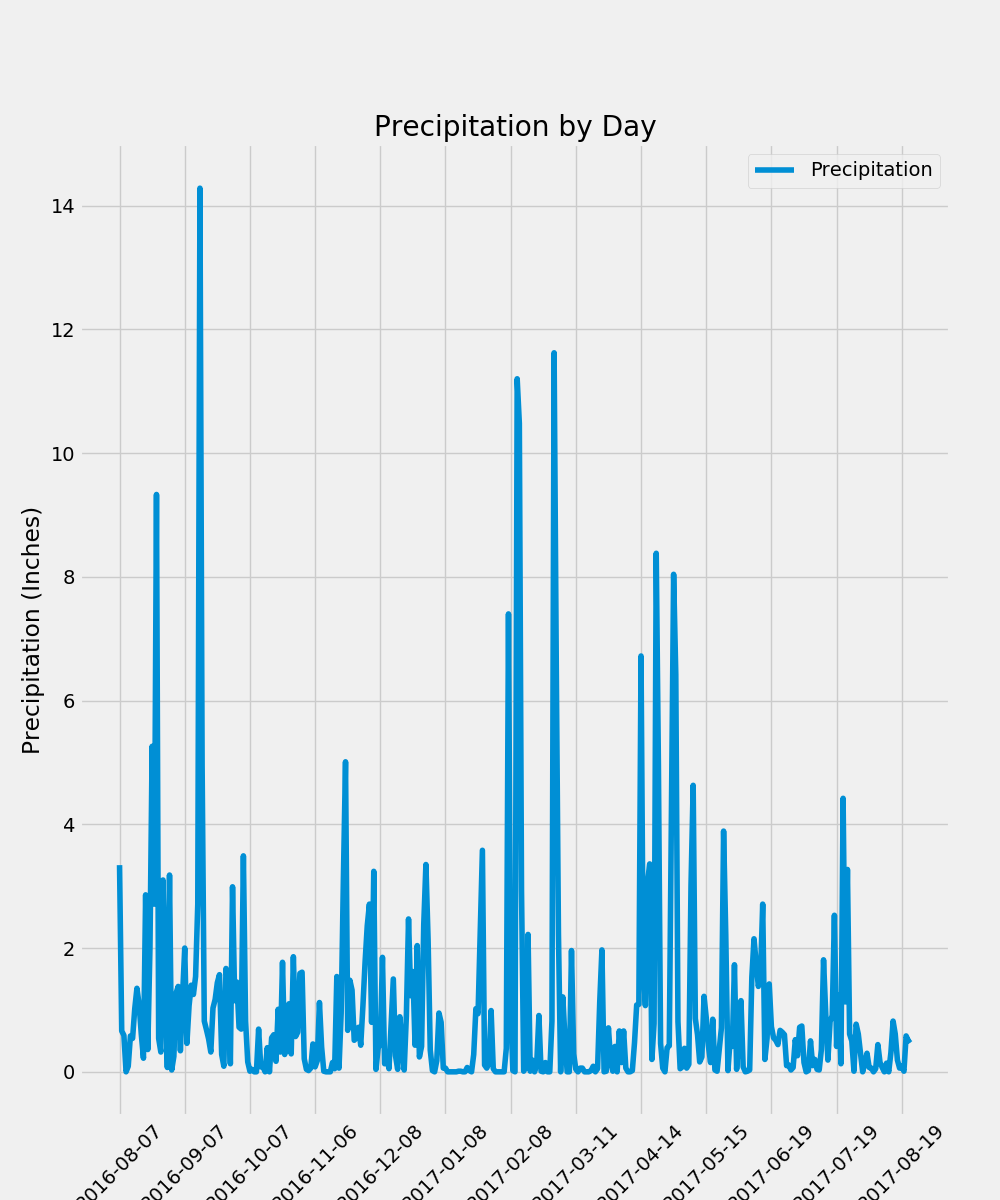

In [87]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

query = session.query(Measurement.date, func.sum(Measurement.prcp)).group_by(Measurement.date).\
    order_by(Measurement.id.desc()).limit(365).all()

# Calculate the date 1 year ago from today

precip = pd.DataFrame(query, columns=['Date', 'Precipitation'])
precip = precip.sort_index(ascending=False)
precip = precip.reset_index()
precip = precip.drop("index", 1)
precip.head()


# Perform a query to retrieve the data and precipitation scores


ticks = np.arange(0, 365, 30)
ticks = ticks.tolist()
ticks

date_tick = []
for x in ticks:
    date = precip["Date"][x]
    date_tick.append(date)
    
date_tick


# Save the query results as a Pandas DataFrame and set the index to the date column

# rain_df = pd.DataFrame(rain)
# rain_df.head()

# Sort the dataframe by date



# Use Pandas Plotting with Matplotlib to plot the data

precip.plot(kind="line", figsize=(10,12))
plt.xticks(ticks, date_tick, rotation=45)
plt.title("Precipitation by Day")
plt.ylabel("Precipitation (Inches)")
# plt.savefig("Figures/Precipitation_by_day")
plt.show()


In [51]:
# Use Pandas to calcualte the summary statistics for the precipitation data

precip_stats = precip.describe()
precip_stats

,Precipitation
count,365.000000
mean,1.026795
std,1.794630
min,0.000000
25%,0.060000
50%,0.440000
75%,1.150000
max,14.280000


In [39]:
# How many stations are available in this dataset?

Station_Count = session.query(func.count(Station.id)).all()
Station_Count

[(9)]

In [53]:
# What are the most active stations?
# List the stations and the counts in descending order.

Station_Activity = session.query(Station.station, func.count(Measurement.date)). \
    filter(Station.station == Measurement.station).\
    group_by(Station.name).order_by(func.count(Measurement.date).desc()).all()

Station_Activity


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [64]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

highest = "USC00519281"

summary_high_tobs = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).order_by(Measurement.id.desc()). \
    filter(Measurement.station == highest).all()
    
print(summary_high_tobs)

high_tobs = session.query(Measurement.date, Measurement.tobs).order_by(Measurement.id.desc()). \
    filter(Measurement.station == highest).limit(365).all()
    
high_tobs


[(54.0, 85.0, 71.66378066378067)]


[('2017-08-18', 79.0),
 ('2017-08-17', 76.0),
 ('2017-08-16', 76.0),
 ('2017-08-15', 77.0),
 ('2017-08-14', 77.0),
 ('2017-08-13', 77.0),
 ('2017-08-06', 83.0),
 ('2017-08-05', 82.0),
 ('2017-08-04', 77.0),
 ('2017-07-31', 76.0),
 ('2017-07-30', 81.0),
 ('2017-07-29', 82.0),
 ('2017-07-28', 81.0),
 ('2017-07-27', 76.0),
 ('2017-07-26', 75.0),
 ('2017-07-25', 77.0),
 ('2017-07-24', 75.0),
 ('2017-07-23', 82.0),
 ('2017-07-22', 77.0),
 ('2017-07-21', 77.0),
 ('2017-07-20', 77.0),
 ('2017-07-19', 76.0),
 ('2017-07-18', 76.0),
 ('2017-07-17', 76.0),
 ('2017-07-16', 80.0),
 ('2017-07-15', 80.0),
 ('2017-07-14', 76.0),
 ('2017-07-13', 74.0),
 ('2017-07-12', 74.0),
 ('2017-07-11', 72.0),
 ('2017-07-10', 69.0),
 ('2017-07-09', 78.0),
 ('2017-07-08', 78.0),
 ('2017-07-07', 75.0),
 ('2017-07-06', 74.0),
 ('2017-07-05', 77.0),
 ('2017-07-04', 78.0),
 ('2017-07-03', 76.0),
 ('2017-07-02', 81.0),
 ('2017-07-01', 79.0),
 ('2017-06-30', 76.0),
 ('2017-06-29', 76.0),
 ('2017-06-28', 77.0),
 ('2017-06-

<IPython.core.display.Javascript object>


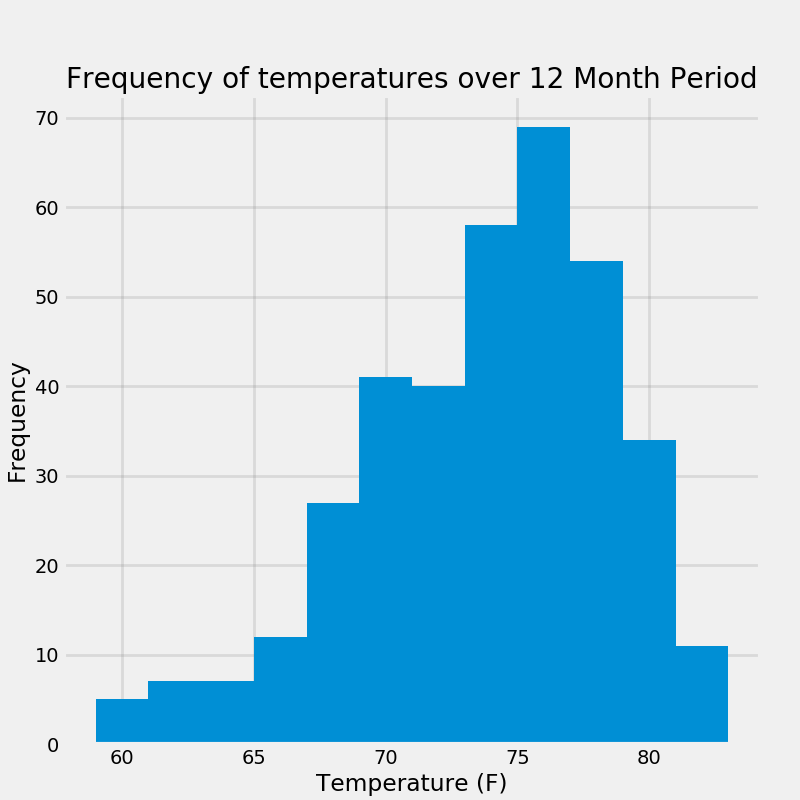

In [69]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

tobs = pd.DataFrame(high_tobs, columns=["Date", "Temp Obs"])
tobs.head()

plt.figure(figsize=(8,8))
plt.hist(tobs["Temp Obs"], bins=12)
plt.grid(color='grey', linestyle='-', linewidth=2, alpha=.2)
plt.ylabel("Frequency")
plt.xlabel("Temperature (F)")
plt.title("Frequency of temperatures over 12 Month Period")
# plt.savefig("Figures/TempHisto")
plt.show()



In [70]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


<IPython.core.display.Javascript object>


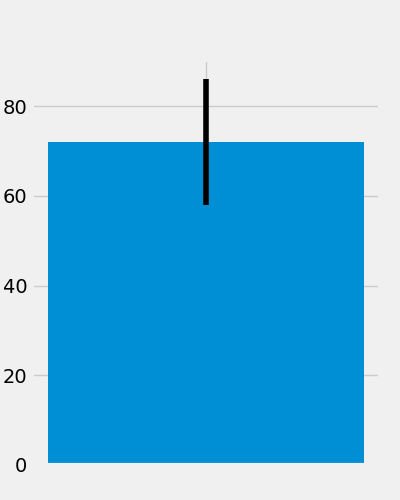

In [77]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


def calc_temps(start_date, end_date):
    trip_dates = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= start_date,\
         Measurement.date <= end_date).all()
    trip_dates_df = pd.DataFrame(trip_dates)
    max_temp = trip_dates_df["tobs"].max()
    min_temp = trip_dates_df["tobs"].min()
    mean_temp = trip_dates_df["tobs"].mean()
    plt.figure(figsize=(4,5))
    plt.bar(1,mean_temp, yerr= max_temp - min_temp, tick_label="")
    plt.show()
calc_temps("2017-02-28", "2017-03-05")


<IPython.core.display.Javascript object>


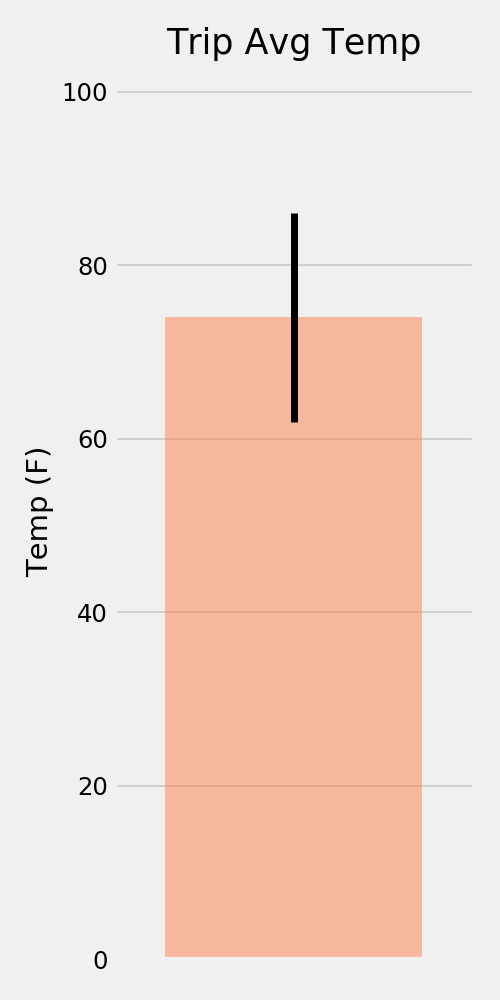

In [18]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [95]:
from flask import Flask, jsonify
app = Flask(__name__)

In [96]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

@app.route("/")
def links():
    return (
        "List of API calls for this website!</br>"
        "/api.v1.0/precipitation</br>"
        "/api/v1.0/stations</br>"
        "/api/v1.0/tobs</br>"
        "/api/v1.0/'start date as YYYY-MM-DD'</br>"
        "/api/v1.0/'start date as YYYY-MM-DD'/'end date as YYYY-MM-DD'</br>"
    )

if __name__ == '__main__':
    app.run(debug=True)


   
    



 * Restarting with stat


SystemExit: 1

C:\Users\ksk4uever\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2969: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


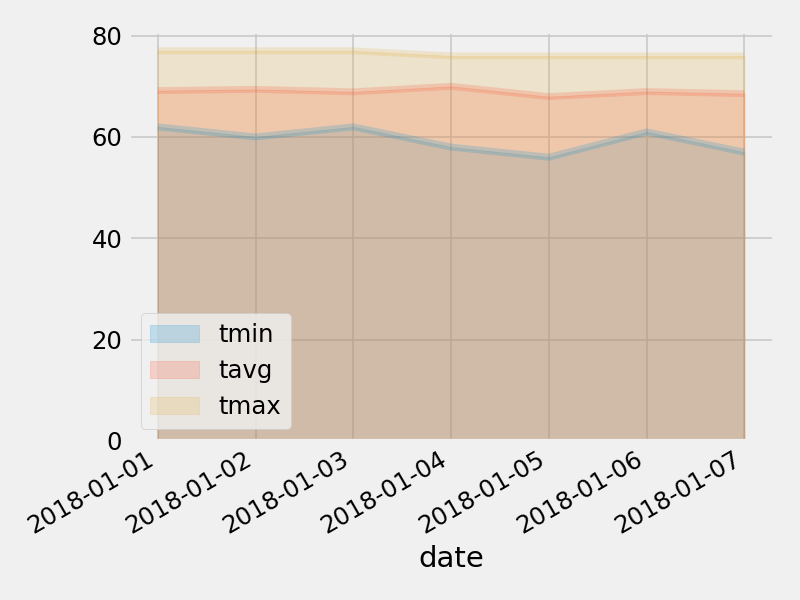

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
